![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import xarray as xr

import ewatercycle.forcing

## LISFLOOD

### Generate forcing

In [2]:
%%capture
lisflood_forcing = ewatercycle.forcing.generate(
    target_model='lisflood', 
    dataset='ERA5', 
    start_time='1990-01-01T00:00:00Z', 
    end_time='1990-12-31T00:00:00Z', 
    shape='./data/Rhine/Rhine.shp',
)

{'auxiliary_data_dir': PosixPath('/home/sarah/GitHub/ewatercycle/docs/examples'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210712_142055/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210712_142055/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210712_142055/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210712_142055/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks from 

In [3]:
print(lisflood_forcing)

eWaterCycle forcing
-------------------
start_time=1990-01-01T00:00:00Z
end_time=1990-12-31T00:00:00Z
directory=/home/sarah/temp/output/recipe_lisflood_20210712_142055/work/diagnostic_daily/script
shape=None
PrefixPrecipitation=lisflood_ERA5_Rhine_pr_1990_1990.nc
PrefixTavg=lisflood_ERA5_Rhine_tas_1990_1990.nc
PrefixE0=e0.nc
PrefixES0=es0.nc
PrefixET0=et0.nc


### Plot forcing

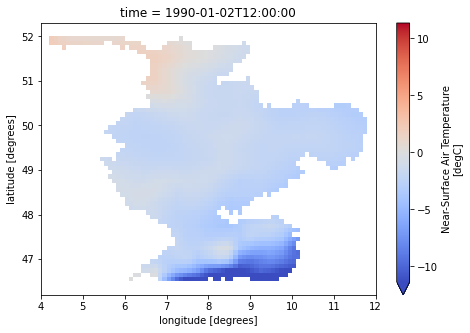

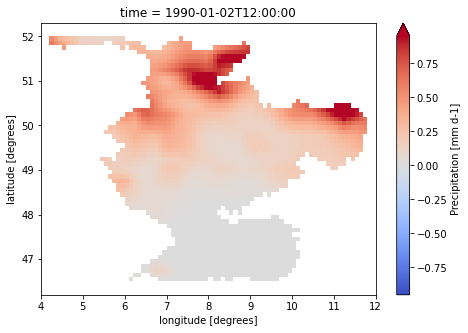

In [10]:
for file_name in [lisflood_forcing.PrefixTavg, lisflood_forcing.PrefixPrecipitation]:
    dataset = xr.load_dataset(f"{lisflood_forcing.directory}/{file_name}")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## Wflow

### Generate forcing

To download `wflow_dem.map`, see the [instructions](https://ewatercycle.readthedocs.io/en/latest/system_setup.html#download-example-parameter-sets).

In [5]:
%%capture
wflow_forcing = ewatercycle.forcing.generate(
    target_model='wflow', 
    dataset='ERA5',  
    start_time='1990-01-01T00:00:00Z', 
    end_time='1990-12-31T00:00:00Z',    
    shape='./data/Rhine/Rhine.shp',
    model_specific_options={  
    'dem_file':'./wflow_rhine_sbm_nc/staticmaps/wflow_dem.map',
    }
)

{'auxiliary_data_dir': PosixPath('/home/sarah/GitHub/ewatercycle/docs/examples'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210712_143206/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210712_143206/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210712_143206/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210712_143206/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks from recipe
Creat

In [6]:
print(wflow_forcing)

Forcing data for Wflow
----------------------
Directory: /home/sarah/temp/output/recipe_wflow_20210712_143206/work/wflow_daily/script
Start time: 1990-01-01T00:00:00Z
End time: 1990-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - netcdfinput: wflow_ERA5_Rhine_1990_1990.nc
  - Precipitation: /pr
  - Temperature: /tas
  - EvapoTranspiration: /pet
  - Inflow: None


### Plot forcing

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 169, lon: 187, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-12-31T12:00:00
  * lat        (lat) float64 52.05 52.02 51.98 51.94 ... 46.0 45.97 45.93 45.89
  * lon        (lon) float64 5.227 5.264 5.3 5.337 ... 11.94 11.97 12.01 12.05
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.2794 0.2794 0.2794 ... nan nan nan
    time_bnds  (time, bnds) datetime64[ns] 1990-01-01 1990-01-02 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 52.07 52.04 52.04 52.0 ... 45.91 45.91 45.88
    lon_bnds   (lon, bnds) float64 5.209 5.245 5.245 5.282 ... 12.03 12.03 12.07
    tas        (time, lat, lon) float32 0.09246 0.07101 0.03317 ... nan nan nan
    pet        (time, lat, lon) float32 0.5102 0.5103 0.5106 ... nan nan nan
Attributes:
    Conventions:  CF-1.7
    provenance:   <?xml version='1.0' encoding='ASCII'?>\n<prov:document xmln...
 

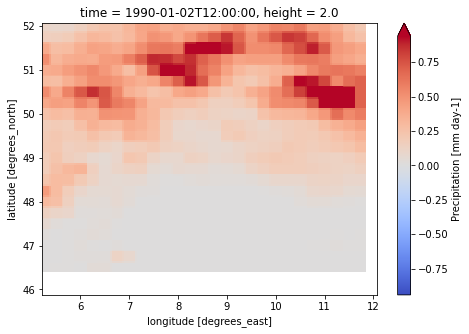

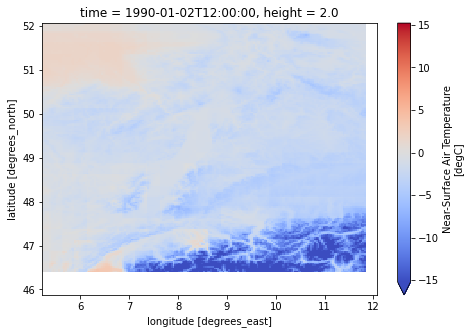

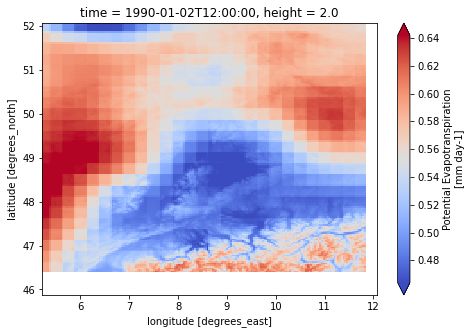

In [7]:
dataset = xr.load_dataset(f"{wflow_forcing.directory}/{wflow_forcing.netcdfinput}")
print(dataset)
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## PCRGlobWB

### Generate forcing

In [8]:
%%capture
pcrglobwb_forcing = ewatercycle.forcing.generate(
    target_model='pcrglobwb', 
    dataset='ERA5',  
    start_time='1990-01-01T00:00:00Z', 
    end_time='1990-12-31T00:00:00Z', 
    shape='./data/Rhine/Rhine.shp',
    model_specific_options={
        'start_time_climatology':'1990-01-01T00:00:00Z',
        'end_time_climatology':'1990-01-01T00:00:00Z',
    },
)

{'auxiliary_data_dir': PosixPath('/home/sarah/GitHub/ewatercycle/docs/examples'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210712_143241/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210712_143241/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210712_143241/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210712_143241/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks f

In [11]:
print(pcrglobwb_forcing)

Forcing data for PCRGlobWB
--------------------------
Directory: /home/sarah/temp/output/recipe_pcrglobwb_20210712_143241/work/diagnostic_daily/script
Start time: 1990-01-01T00:00:00Z
End time: 1990-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - temperatureNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1990_Rhine.nc
  - precipitationNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1990_Rhine.nc


### Plot forcing

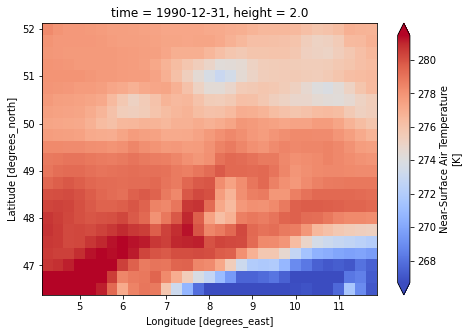

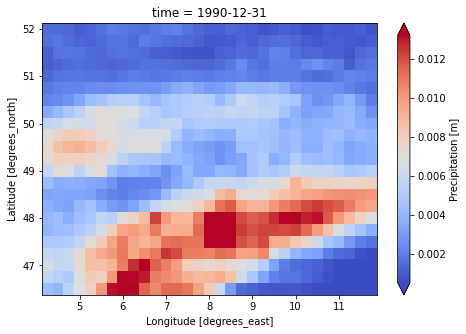

In [13]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)